<a href="https://colab.research.google.com/github/trandinh/study-mlops/blob/main/GithubAction_with_Azure_storage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resources
An Azure subscription and GitHub account.
# Steps
1. Generate deployment credentials/ AZURE CLI
2. Configure the GitHub secret/ Github
3. Add your workflow/ Github
4. create yaml workflow file
  1. login to azure 
  2. upload github code to blob storage 
  3. logout from azure 
5. reference: https://docs.microsoft.com/en-us/azure/developer/github/connect-from-azure?tabs=azure-portal%2Clinux 


**1. Generate deployment credentials/ AZURE CLI**\


> az ad sp create-for-rbac --name github-respository-name --role contributir --scopes /subscriptions/AZURE-SUBSCRIPTION-ID/resourceGroups/AZURE-RESOURCE-GROUP-NAME --sdk-auth



**2. Configure the GitHub secret** \
Enter the output of above command to github secret

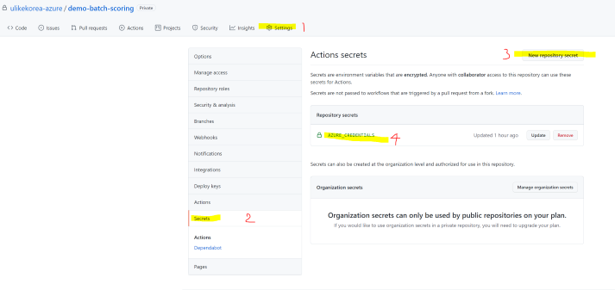

**3. Github workflow**

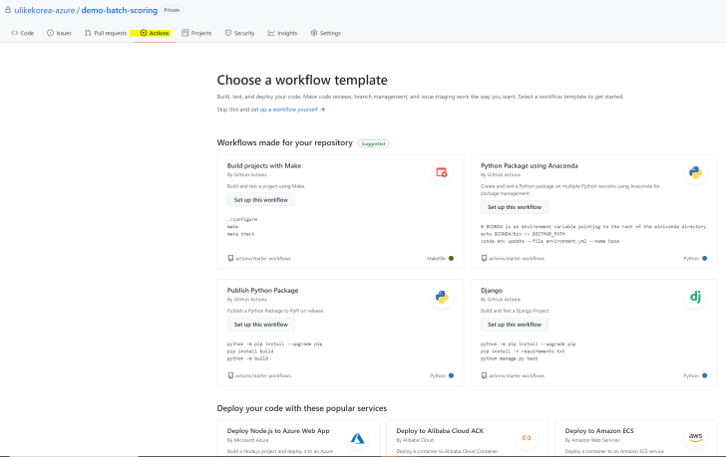

**4. workflow .yml file**

In [3]:
# This is a basic workflow that is manually triggered

name: Upload source code to Azure storage

on:
    release:
        types: [published]
        
jobs:
  build:
    runs-on: ubuntu-latest
    steps:
    - uses: actions/checkout@v2
    - uses: azure/login@v1
      with:
          creds: ${{ secrets.AZURE_CREDENTIALS }}
    
    - name: Upload to blob storage
      uses: azure/CLI@v1
      with:
        azcliversion: latest
        inlineScript: |
            az storage blob upload-batch --account-name preprocesingstorage  --auth-mode key -d 'scripts' -s 'data-processing-module'
            
            
    # Azure logout
    - name: logout
      run: |
            az logout
      if: always()

SyntaxError: ignored